# RFC with all generated features

In [ ]:
import numpy as np
import pandas 
import os

In [2]:
#  Load the data from combined_df.csv
target = pandas.read_csv('../datasets/kag_red.csv')

In [16]:
from sklearn.model_selection import train_test_split

y = target['subreddit']  # Target

In [ ]:
X_combined = np.load('../datasets//final_X.npy')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_combined  , y, test_size=0.2, random_state=42)

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

## Fitting the data and predicting with the model

In [19]:
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', verbose=2)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  4.0min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.1s


Accuracy: 0.680373831775701


## Results

In [20]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72      1577
           1       0.83      0.83      0.83      9182
           2       0.85      0.66      0.74      1254
           3       0.80      0.74      0.77     11419
           4       0.95      0.66      0.78      1754
           5       0.93      0.54      0.68      4899
           6       0.54      0.81      0.65     23472
           7       0.74      0.47      0.57      4724
           8       0.89      0.53      0.66      1766
           9       0.94      0.48      0.63      1788
          10       0.69      0.49      0.57     13065

    accuracy                           0.68     74900
   macro avg       0.82      0.62      0.69     74900
weighted avg       0.72      0.68      0.68     74900



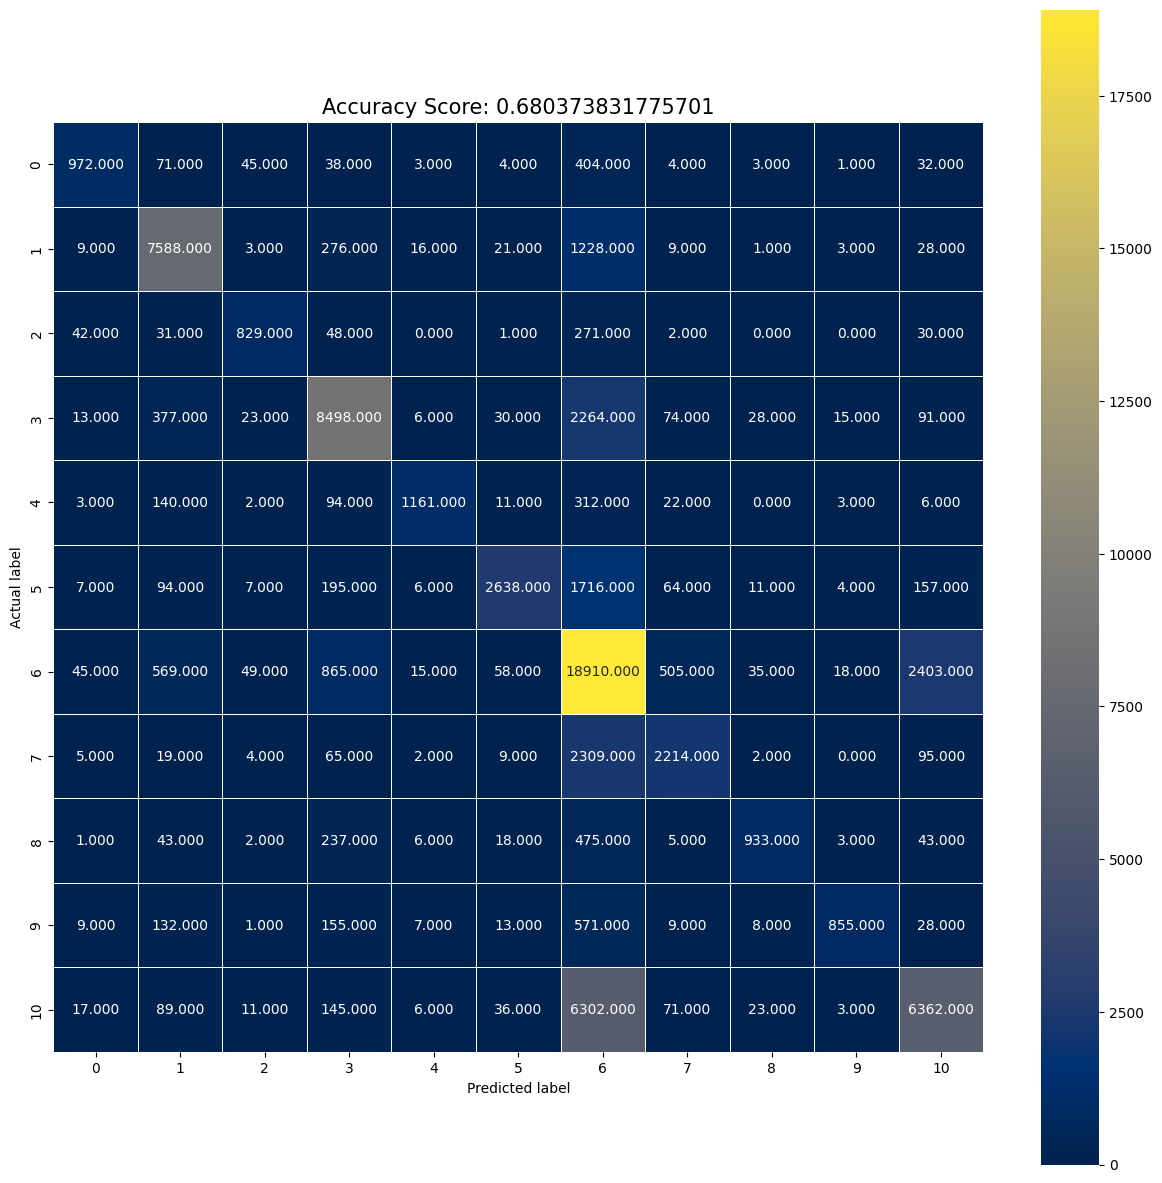

In [21]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy), size=15)
plt.show()